In [37]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import sys

from alpha_vantage.timeseries import TimeSeries

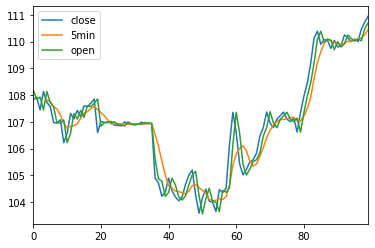

In [74]:
ts = TimeSeries(key='Keys')
data, meta_data = ts.get_intraday('AAPL')
df = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close', 'volume'])
for d, p in data.items():
    date = datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S')
    data_row=[date, float(p['1. open']), float(p['2. high']), float(p['3. low']), float(p['4. close']), int(p['5. volume'])]
    df.loc[-1,:]=data_row
    df.index=df.index+1
data =df.sort_values('date')
data['open']= data['open'].astype(float)
data['close']= data['close'].astype(float)
#data['high'] = data['high'].astype(float)
#data['1min']=np.round(data['close'].rolling(window=5).mean(),2)
data['5min']=np.round(data['close'].rolling(window=5).mean(),2)
data[['close', '5min', 'open']].plot()
plt.show()

In [75]:
data.describe()

,open,close,5min
count,100.000000,100.000000,96.000000
mean,106.927680,106.964930,106.868750
std,1.862824,1.900005,1.794171
min,103.560000,103.590000,104.050000
25%,105.490500,105.482500,105.547500
50%,106.967500,106.975000,106.930000
75%,107.701250,107.706075,107.485000
max,110.700000,110.950000,110.450000


In [76]:
print(data)

                   date      open     high      low     close    volume  \
0   2020-09-18 11:15:00  108.1800   108.43   107.55  107.8400  10749776   
1   2020-09-18 11:30:00  107.8400   108.29   107.76  107.9306   6058382   
2   2020-09-18 11:45:00  107.9300   107.94    107.2  107.4454   8382586   
3   2020-09-18 12:00:00  107.4500   108.35   107.42  108.1400   6281652   
4   2020-09-18 12:15:00  108.1400    109.7   107.65  107.7300   5887680   
5   2020-09-18 12:30:00  107.7200   107.77   107.25  107.5700   7111507   
6   2020-09-18 12:45:00  107.5601   107.65   106.72  106.9800   9509371   
7   2020-09-18 13:00:00  106.9614   107.16   106.52  106.9587   7156945   
8   2020-09-18 13:15:00  106.9600   107.15   106.55  107.0800   6297159   
9   2020-09-18 13:30:00  107.0750  107.075    106.2  106.2200   6273055   
10  2020-09-18 13:45:00  106.2200   106.69   106.09  106.5750   7235668   
11  2020-09-18 14:00:00  106.5700   107.39   106.37  107.3150   6102957   
12  2020-09-18 14:15:00  